In [3]:
!pip install texthero

You should consider upgrading via the 'c:\users\bryan kheirallah\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as stats
import texthero as hero
from texthero import preprocessing as hp
from texthero import stopwords
import nltk
import numpy as np
import regex as re

In [5]:
#Plotting an histogram.
def plothisto(toPlot, xlabel,ylabel,title,bins = 50):
    plt.hist(toPlot, bins = bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [6]:
tsla = pd.read_csv("TSLA.csv")
display(tsla)

,PERMNO,date,RET
0,93436,20100629,C
1,93436,20100630,-0.002511
2,93436,20100701,-0.078473
3,93436,20100702,-0.125683
4,93436,20100706,-0.160938
...,...,...,...
2894,93436,20211227,0.025248
2895,93436,20211228,-0.005000
2896,93436,20211229,-0.002095
2897,93436,20211230,-0.014592


c:\users\bryan kheirallah\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


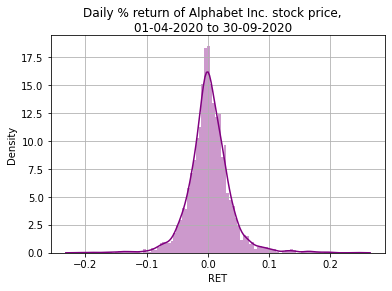

In [7]:
sns.distplot(tsla['RET'].drop(0),bins=100,color='purple')
plt.suptitle('Daily % return of Alphabet Inc. stock price,\n01-04-2020 to 30-09-2020', fontsize=12, color='black')
plt.grid(True)
plt.show()

## Since this are returns of a stock we expect the distribution to be heavy tailed
We dont have enough datapoints to show that the distribution is heavy tailes, still we can see that the mass of the distribution seems to be more concentrated in the middle and in the tail and less on the middle part!

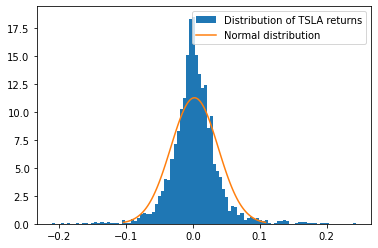

In [8]:
values = tsla['RET'].drop(0).values.astype(float)
plt.hist(values, bins=100, density = True, log = False, label = 'Distribution of TSLA returns')
mu = values.mean()
sigma = values.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label = 'Normal distribution')
plt.legend()
plt.show()

Let's look at the most extreeme values to check if there are some outliers that are unreasonable. We can observe below that most extreeme values are have magnitude less than 0.25. Everything looks good as expected (data source is wrds).

In [9]:
sortedVals = np.sort(tsla['RET'].drop(0).astype(float).values)
print('smallest rets',sortedVals[:10])
print('biggest rets',sortedVals[-10:])

smallest rets [-0.210628 -0.193274 -0.185778 -0.171758 -0.160938 -0.160344 -0.150914
 -0.145071 -0.143093 -0.139015]
biggest rets [0.165338 0.167179 0.170392 0.173471 0.176692 0.183877 0.192042 0.196412
 0.198949 0.244029]


In [10]:
df = pd.read_csv("elonmusk.csv")
df

,Tweet,UserScreenName,UserName,Timestamp,text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,0,Elon Musk,@elonmusk,2010-06-04T18:31:57.000Z,"Please ignore prior tweets, as that was someon...",NaN,873,648,"5,453",[],https://twitter.com/elonmusk/status/15434727182
1,1,Elon Musk,@elonmusk,2011-12-01T09:55:11.000Z,Went to Iceland on Sat to ride bumper cars on ...,NaN,30,24,188,['https://pbs.twimg.com/media/Afkf5DMCAAEJGFr?...,https://twitter.com/elonmusk/status/1421799282...
2,2,Elon Musk,@elonmusk,2011-12-01T10:29:04.000Z,I made the volume on the Model S http://ow.ly/...,NaN,29,17,78,[],https://twitter.com/elonmusk/status/1421884581...
3,3,Elon Musk,@elonmusk,2011-12-03T08:20:28.000Z,"Great Voltaire quote, arguably better than Twa...",NaN,23,30,44,[],https://twitter.com/elonmusk/status/1428808713...
4,4,Elon Musk,@elonmusk,2011-12-03T08:22:07.000Z,That was a total non sequitur btw\n26\n14\n50,NaN,26,14,50,[],https://twitter.com/elonmusk/status/1428812840...
...,...,...,...,...,...,...,...,...,...,...,...
12201,12201,Elon Musk,@elonmusk,2022-03-03T04:25:03.000Z,Replying to \n@TheBabylonBee\n515\n464\n14.5K,🤣,515,464,14.5K,[],https://twitter.com/elonmusk/status/1499239406...
12202,12202,Elon Musk,@elonmusk,2022-03-03T08:13:32.000Z,Replying to \n@OwenSparks_\n @ICannot_Enough\n...,NaN,286,204,"4,003",[],https://twitter.com/elonmusk/status/1499296906...
12203,12203,Elon Musk,@elonmusk,2022-03-02T03:15:03.000Z,Replying to \n@DBurkland\nInvestigating\n350\n...,NaN,350,165,"5,133",[],https://twitter.com/elonmusk/status/1498859400...
12204,12204,Elon Musk,@elonmusk,2022-03-04T21:40:29.000Z,Replying to \n@RenataKonkoly\n @MLUKBrandenbur...,NaN,233,185,"4,191",[],https://twitter.com/elonmusk/status/1499862369...


In [11]:
df['text']= df['text'].astype(str)

Let's look at some of our tweets:
after looking at some tweets here is one that explain all our unexpected foundings.

In [12]:
for text in list(df['text'][df['text'].apply(lambda x: x[:13] == ('Replying to ' + '\n'))].iloc[88:89]):
  print(text)
  print("----------------------------------------------")
print(df['text'].iloc[12202])

Replying to 
@TheMilns
@TheMilns
 Try this: http://m.youtube.com/#/watch?feature=youtu.be&v=se7_JpbtPwA&desktop_uri=%2Fwatch%3Fv%3Dse7_JpbtPwA%26feature%3Dyoutu.be…
2
4
3
----------------------------------------------
Replying to 
@OwenSparks_
 @ICannot_Enough
 and 2 others
Yes
286
204
4,003


In [13]:
for i in range(100,1000):
  for text in list(df['text'][df['text'].apply(lambda x: 'and '+str(i) +'others' in x)].values[0:100]):
    print(text)
    print("----------------------------------------------")

By looking into some tweets we can see that:
* We have the last 3 numbers that are the number of comments/likes/retweets that we need to remove!
* Some tweets starts with 

      Replying to 

      @FareedZakaria

      @FareedZakaria

      (Could be followed by) 'and number others'
We need to remove it.
* There are many websites url that are not really informative and we could think about removing them
* From last cell above we can see that the maximum number contained in a 'and number others' inside a tweet is 100. (We will assume that in the following implementation)


In [14]:
def reformat(text):
  """for every line in the tweets remove white spaces
  that are at the beginning or at the end of the line"""
  return "\n".join([line.strip() for line in text.split('\n')])
  
def removeReplyingTo(text):
  """Remove all expression 'Replying to' followed by a list
  of '@user' (and sometimes) and n others"""
  # if the sentence contains an expression
  # of type 'Replying to' followed by a list
  # of '@user' we remove them
  if text[:12] == ('Replying to' + '\n'):
    text = text[12:]
    while (text != '' and text[0] == '@'):
      try : 
        idx = text.index('\n') 
        idx += 1
      except:
        break
      if(len(text[:idx].split(" ")) == 1):
        text = text[idx:]
      else: break
  # if the sentence contains an expression
  # of type 'and number others' we remove it
  if text[0:4] == 'and ':
    if text[6:12] == 'others':
      text = text[13:]
    elif text[7:13] == 'others':
      text = text[14:]
  return text

def removeEndNumbers(text):
  """Removes last three lines from a tweet, this lines are containing number of \
   comments/likes/retweets"""
  return "\n".join(text.split('\n')[0:-3])

def removeUrls(text):
  """Remove URLS"""
  text = re.sub(r"http\S+", "", text)
  text = re.sub(r"https\S+", "", text)
  return text

def clean_prepro(df):
  df = df.apply(lambda text: reformat(text))
  df_clean = df.apply(lambda text: removeEndNumbers(text))
  print("I'm done part 1")
  df_clean = df_clean.apply(lambda text: removeUrls(text))
  print("I'm done part 2")
  df_clean = df_clean.apply(lambda text: removeReplyingTo(text))
  print("I'm done part 3")
  return df_clean

In [15]:
# testing
print("--------------------FIRST TEST--------------------------------")
text = df['text'].iloc[12202]
print(text)
print(removeReplyingTo(removeEndNumbers(text)))
print("--------------------SECOND TEST--------------------------------")
text = df['text'].iloc[457]	
print(text)
removeReplyingTo(removeUrls(removeEndNumbers(text)))

--------------------FIRST TEST--------------------------------
Replying to 
@OwenSparks_
 @ICannot_Enough
 and 2 others
Yes
286
204
4,003
Replying to 
@OwenSparks_
 @ICannot_Enough
 and 2 others
Yes
--------------------SECOND TEST--------------------------------
Replying to 
@TheMilns
@TheMilns
 Try this: http://m.youtube.com/#/watch?feature=youtu.be&v=se7_JpbtPwA&desktop_uri=%2Fwatch%3Fv%3Dse7_JpbtPwA%26feature%3Dyoutu.be…
2
4
3


'Replying to \n@TheMilns\n@TheMilns\n Try this: '

In [16]:
df['length'] = df['text'].apply(lambda text: len(text.split()))


In [17]:
df['day'] = pd.to_datetime(df['Timestamp'].apply(lambda date : date[0:10]))

We can see that often tweets are starting with Replying to @USER, this part of the tweet is not informative for us, and will probably be removed from the dataset.

## 2. Let's explore the distribution of lenght of tweets.

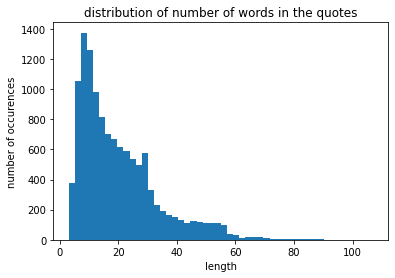

In [18]:
#Plotting an histogram of the length of the quotations in words.   
plothisto(df['length'], 'length','number of occurences','distribution of number of words in the quotes',50)

## 2. Let's explore the tweets mean lenght over time.

In [19]:
dailylen = df[['length','day']].groupby(by = 'day').mean().reset_index()
display(dailylen)

,day,length
0,2010-06-04,20.000000
1,2011-12-01,26.000000
2,2011-12-03,17.000000
3,2011-12-04,15.000000
4,2011-12-21,27.142857
...,...,...
2224,2022-02-26,11.333333
2225,2022-03-01,26.000000
2226,2022-03-02,29.428571
2227,2022-03-03,28.285714


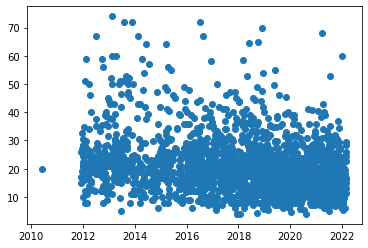

In [20]:
plt.scatter(dailylen['day'], dailylen['length']);

In [21]:
df['date_ordinal'] = pd.to_datetime(df['Timestamp']).apply(lambda date: date.toordinal())
display(df['date_ordinal'])

0        733927
1        734472
2        734472
3        734474
4        734474
          ...  
12201    738217
12202    738217
12203    738216
12204    738218
12205    738218
Name: date_ordinal, Length: 12206, dtype: int64

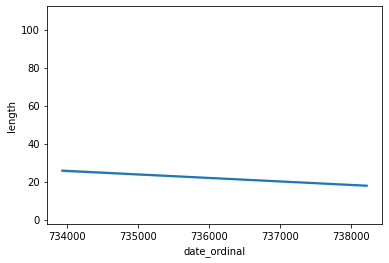

In [22]:
sns.regplot(x='date_ordinal', y='length', data=df,marker="None");

The lenght of the tweets of Elon Musk is decreasing over time!

## 2. Let's analyize the distribution of number of tweets over time.

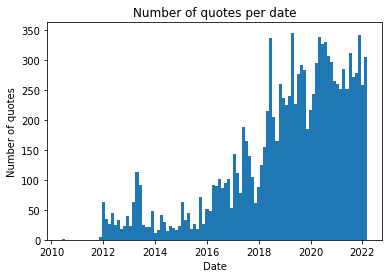

In [23]:
formatted_df = df.copy()
#change time format
formatted_df["date"] = pd.to_datetime(formatted_df['Timestamp'], format='%Y-%m-%d %H:%M:%S')

#plot the data
bins = 100
hist = plt.hist(formatted_df["date"].dt.date,bins)
plt.xlabel("Date")
plt.ylabel("Number of quotes")
plt.title("Number of quotes per date")
plt.show()

We can observe that the number of Elon Musk's tweets has increased over time

## How many tweets are tweets and how many are replies?
Let's check how many tweets are reply to others, and how many are posts on the account.

In [25]:
reformattedtext = df['text'].apply(lambda text: reformat(text))
print('The total number of tweets is: ',reformattedtext.size)
replies = reformattedtext[reformattedtext.apply(lambda x: x[:12] == ('Replying to' + '\n'))]
print('The total number of replies is: ',replies.size)
print('The total number of main posts is: ',reformattedtext.size-replies.size)                                                     

The total number of tweets is:  12206
The total number of replies is:  8844
The total number of main posts is:  3362


We can see that Elon Musk main activity on the platform is post answering.

## At what time does Elon Musk uses twitter?
Let's see at what time Elon Musk uses twitter.

[]

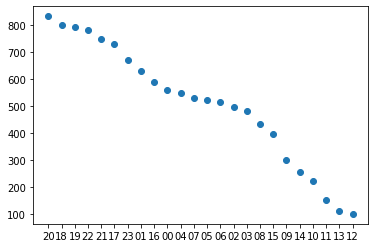

In [26]:
x = df['Timestamp'].apply(lambda time: time[11:13]).value_counts().index.values
y = df['Timestamp'].apply(lambda time: time[11:13]).value_counts().values
plt.scatter(x,y)
plt.plot()

## What about the content of the tweets?
Let's check the most frequend words that are not stopwords or punctuation or verbs or tags

In [34]:
def clean(series):
    "function that cleans a quote"
    series = hp.fillna(series)
    series = hp.lowercase(series)
    series = hp.remove_digits(series)
    series = hp.remove_diacritics(series)
    default_stopwords = stopwords.DEFAULT
    custom_stopwords = default_stopwords - (set(["above", "below", "up", "down", "over", "under", "most", "few"]))
    custom_stopwords = custom_stopwords.union(set(["yes", "would", "yeah", "like", "get"]))
    series = hp.remove_stopwords(series, custom_stopwords)
    series = hp.remove_whitespace(series)
    series = hp.remove_punctuation(series)
    series = hp.fillna(series)
    return series

def remove_verbs(series):
    """ function that removes all verbs from a series of sentences (series in the sense of pandas)"""
    def remove_verbs_from_sentence(sentence):
        """ function that removes all verbs from a sentence"""
        #tokenizes the sentence (makes it become a list of words)
        tokens = nltk.word_tokenize(sentence)

        #tags words, for example if the word is a verb in it's base form then it tags it with 'VB'
        #tagged becomes a list of tuples with (verb,tag) as format
        tagged = nltk.pos_tag(tokens)

        #filter all verbs from list
        tagged =list(filter(lambda x: x[1] not in  ['VB','VBD','VBG','VBN','VBP','VBZ','MD'],tagged))
 
        #remove tags from words
        words = list(map(lambda x: x[0], tagged))

        #join the words to have a sentence once againg
        sentence = ' '.join(words)
        return sentence

    return series.apply(remove_verbs_from_sentence)

In [62]:
cleanedtxt = clean(clean_prepro(df['text']))

I'm done part 1
I'm done part 2
I'm done part 3


In [63]:
# punkt
# averaged_perceptron_tagger
nltk.download()
cleanedtxtNoVerbs = remove_verbs(cleanedtxt)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Bryan Kheirallah/nltk_data'
    - 'c:\\users\\bryan kheirallah\\appdata\\local\\programs\\python\\python37\\nltk_data'
    - 'c:\\users\\bryan kheirallah\\appdata\\local\\programs\\python\\python37\\share\\nltk_data'
    - 'c:\\users\\bryan kheirallah\\appdata\\local\\programs\\python\\python37\\lib\\nltk_data'
    - 'C:\\Users\\Bryan Kheirallah\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [65]:
hero.top_words(cleanedtxt)[:500].to_csv("topwords.csv")

We see that many words present are still some wird punctuation that needs to be removed to see the real most frequent words. We see that mosto of the content is related to elon musk in general (spacex,elonmusk...) but we are happy to remark that the first, most frequent significant word is TESLA!
That said we can deduce that many tweets are not involving tesla for example we can see (with no surprise) that between the  tranding word there are spaceX and rocket. 
Even if it's true that tesla and spaceX could be correlated, and therefore the tweets of spaceX could potentially impact tesla's returns, we have to keep in mind that topic selection to keep only relevant tweets is an option for the preprocessing.

## PREPROCESSING
We are going to add the following columns to the dataset:
* clean_txt which contains cleaned version of the text
* clean_txt25,clean_txt50,clean_txt75,clean_txt100 which contains cleaned version of the text limited to a maximum number of words




In [57]:
df['cleantext'] = clean(clean_prepro(df['text']))
df = df[df['cleantext'] != ""]

I'm done part 1
I'm done part 2
I'm done part 3


In [58]:
def keepNwords(text,numWords):
  return " ".join(text.split(" ")[:numWords])

df['clean25'] = df['cleantext'].apply(lambda text: keepNwords(text,25))
df['clean50'] = df['cleantext'].apply(lambda text: keepNwords(text,50))
df['clean75'] = df['cleantext'].apply(lambda text: keepNwords(text,75))
df['clean100'] = df['cleantext'].apply(lambda text: keepNwords(text,100))


c:\users\bryan kheirallah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\bryan kheirallah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\bryan kheirallah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set o

In [59]:
df.isnull().sum()

Tweet                 0
UserScreenName        0
UserName              0
Timestamp             0
text                  0
Emojis            10985
Comments             18
Likes                22
Retweets              0
Image link            0
Tweet URL             0
length                0
day                   0
date_ordinal          0
cleantext             0
clean25               0
clean50               0
clean75               0
clean100              0
dtype: int64

In [61]:
filepath = 'elonmuskClean.csv'
df.to_csv(filepath)